# Wine data clustering 

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.





Library imports 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA


Dataset upload

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [4]:
df = pd.read_csv("wine-clustering.csv")

# Exploratory Data Analysis & Visualisation

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [12]:
df.count()

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64

In [13]:
# Checking missing values
pd.isnull(df).any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Checking distribution of the features in the data and skewness.
Skewness closer to zero is normally distributed. 

<Figure size 1224x720 with 0 Axes>

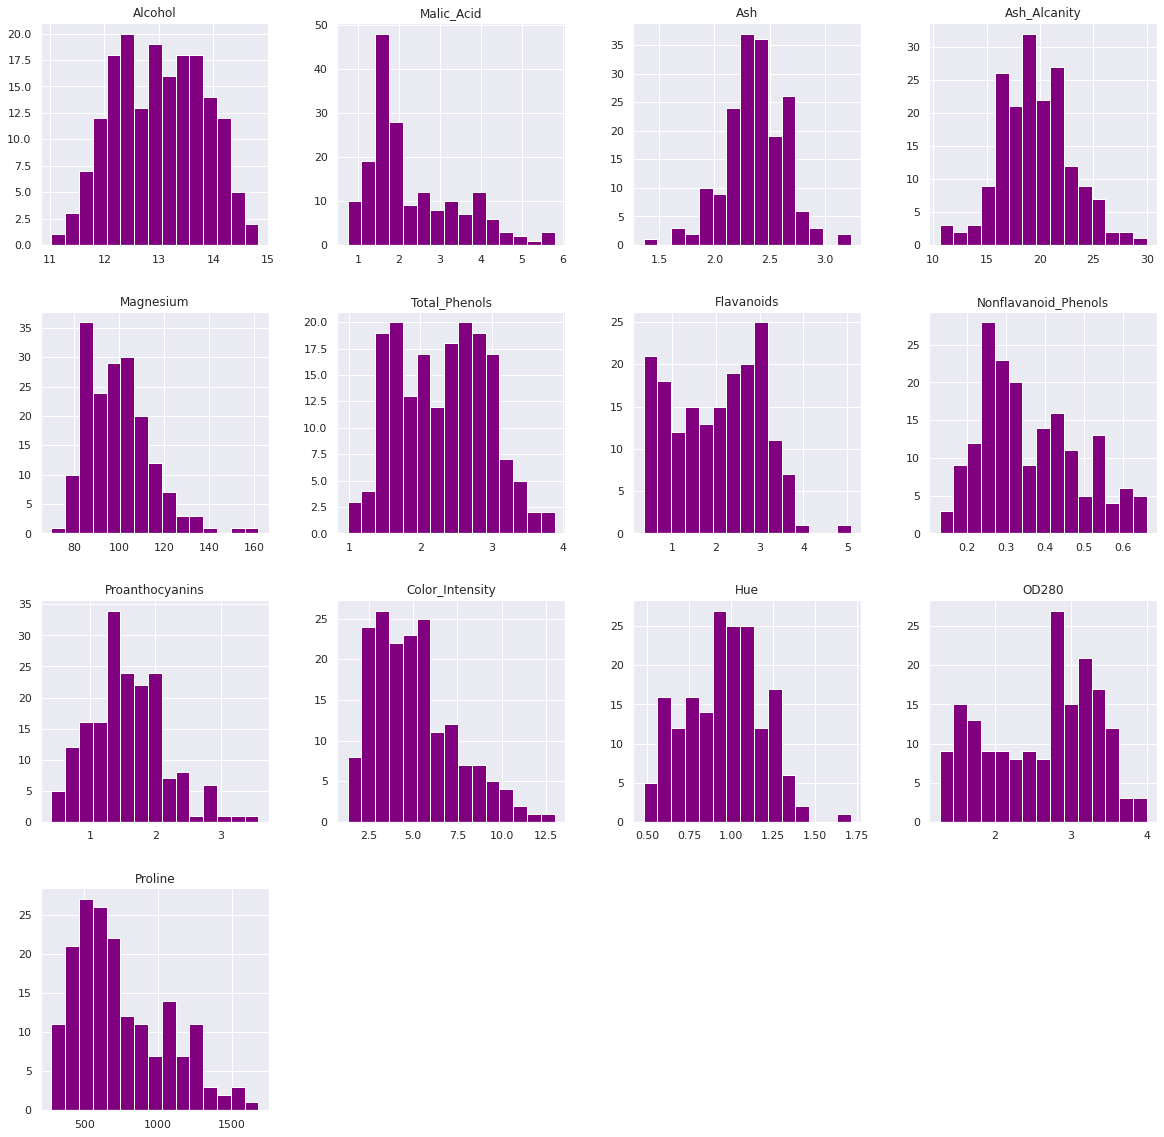

In [26]:
plt.figure(figsize=(17,10))
sns.set(font_scale=1)
df.hist(bins=15,color="purple")
plt.show()

In [21]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [17]:
mask = np.zeros_like(df.corr())

In [18]:
tri = np.triu_indices_from(mask)
mask[tri] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

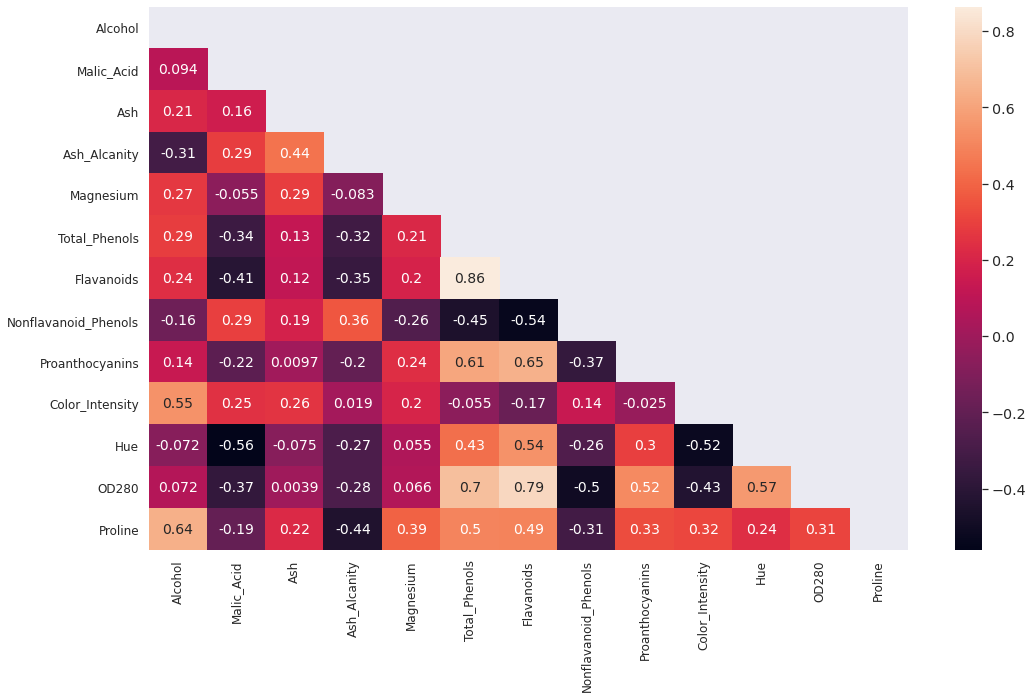

In [19]:
# Checking Correlation of features 
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

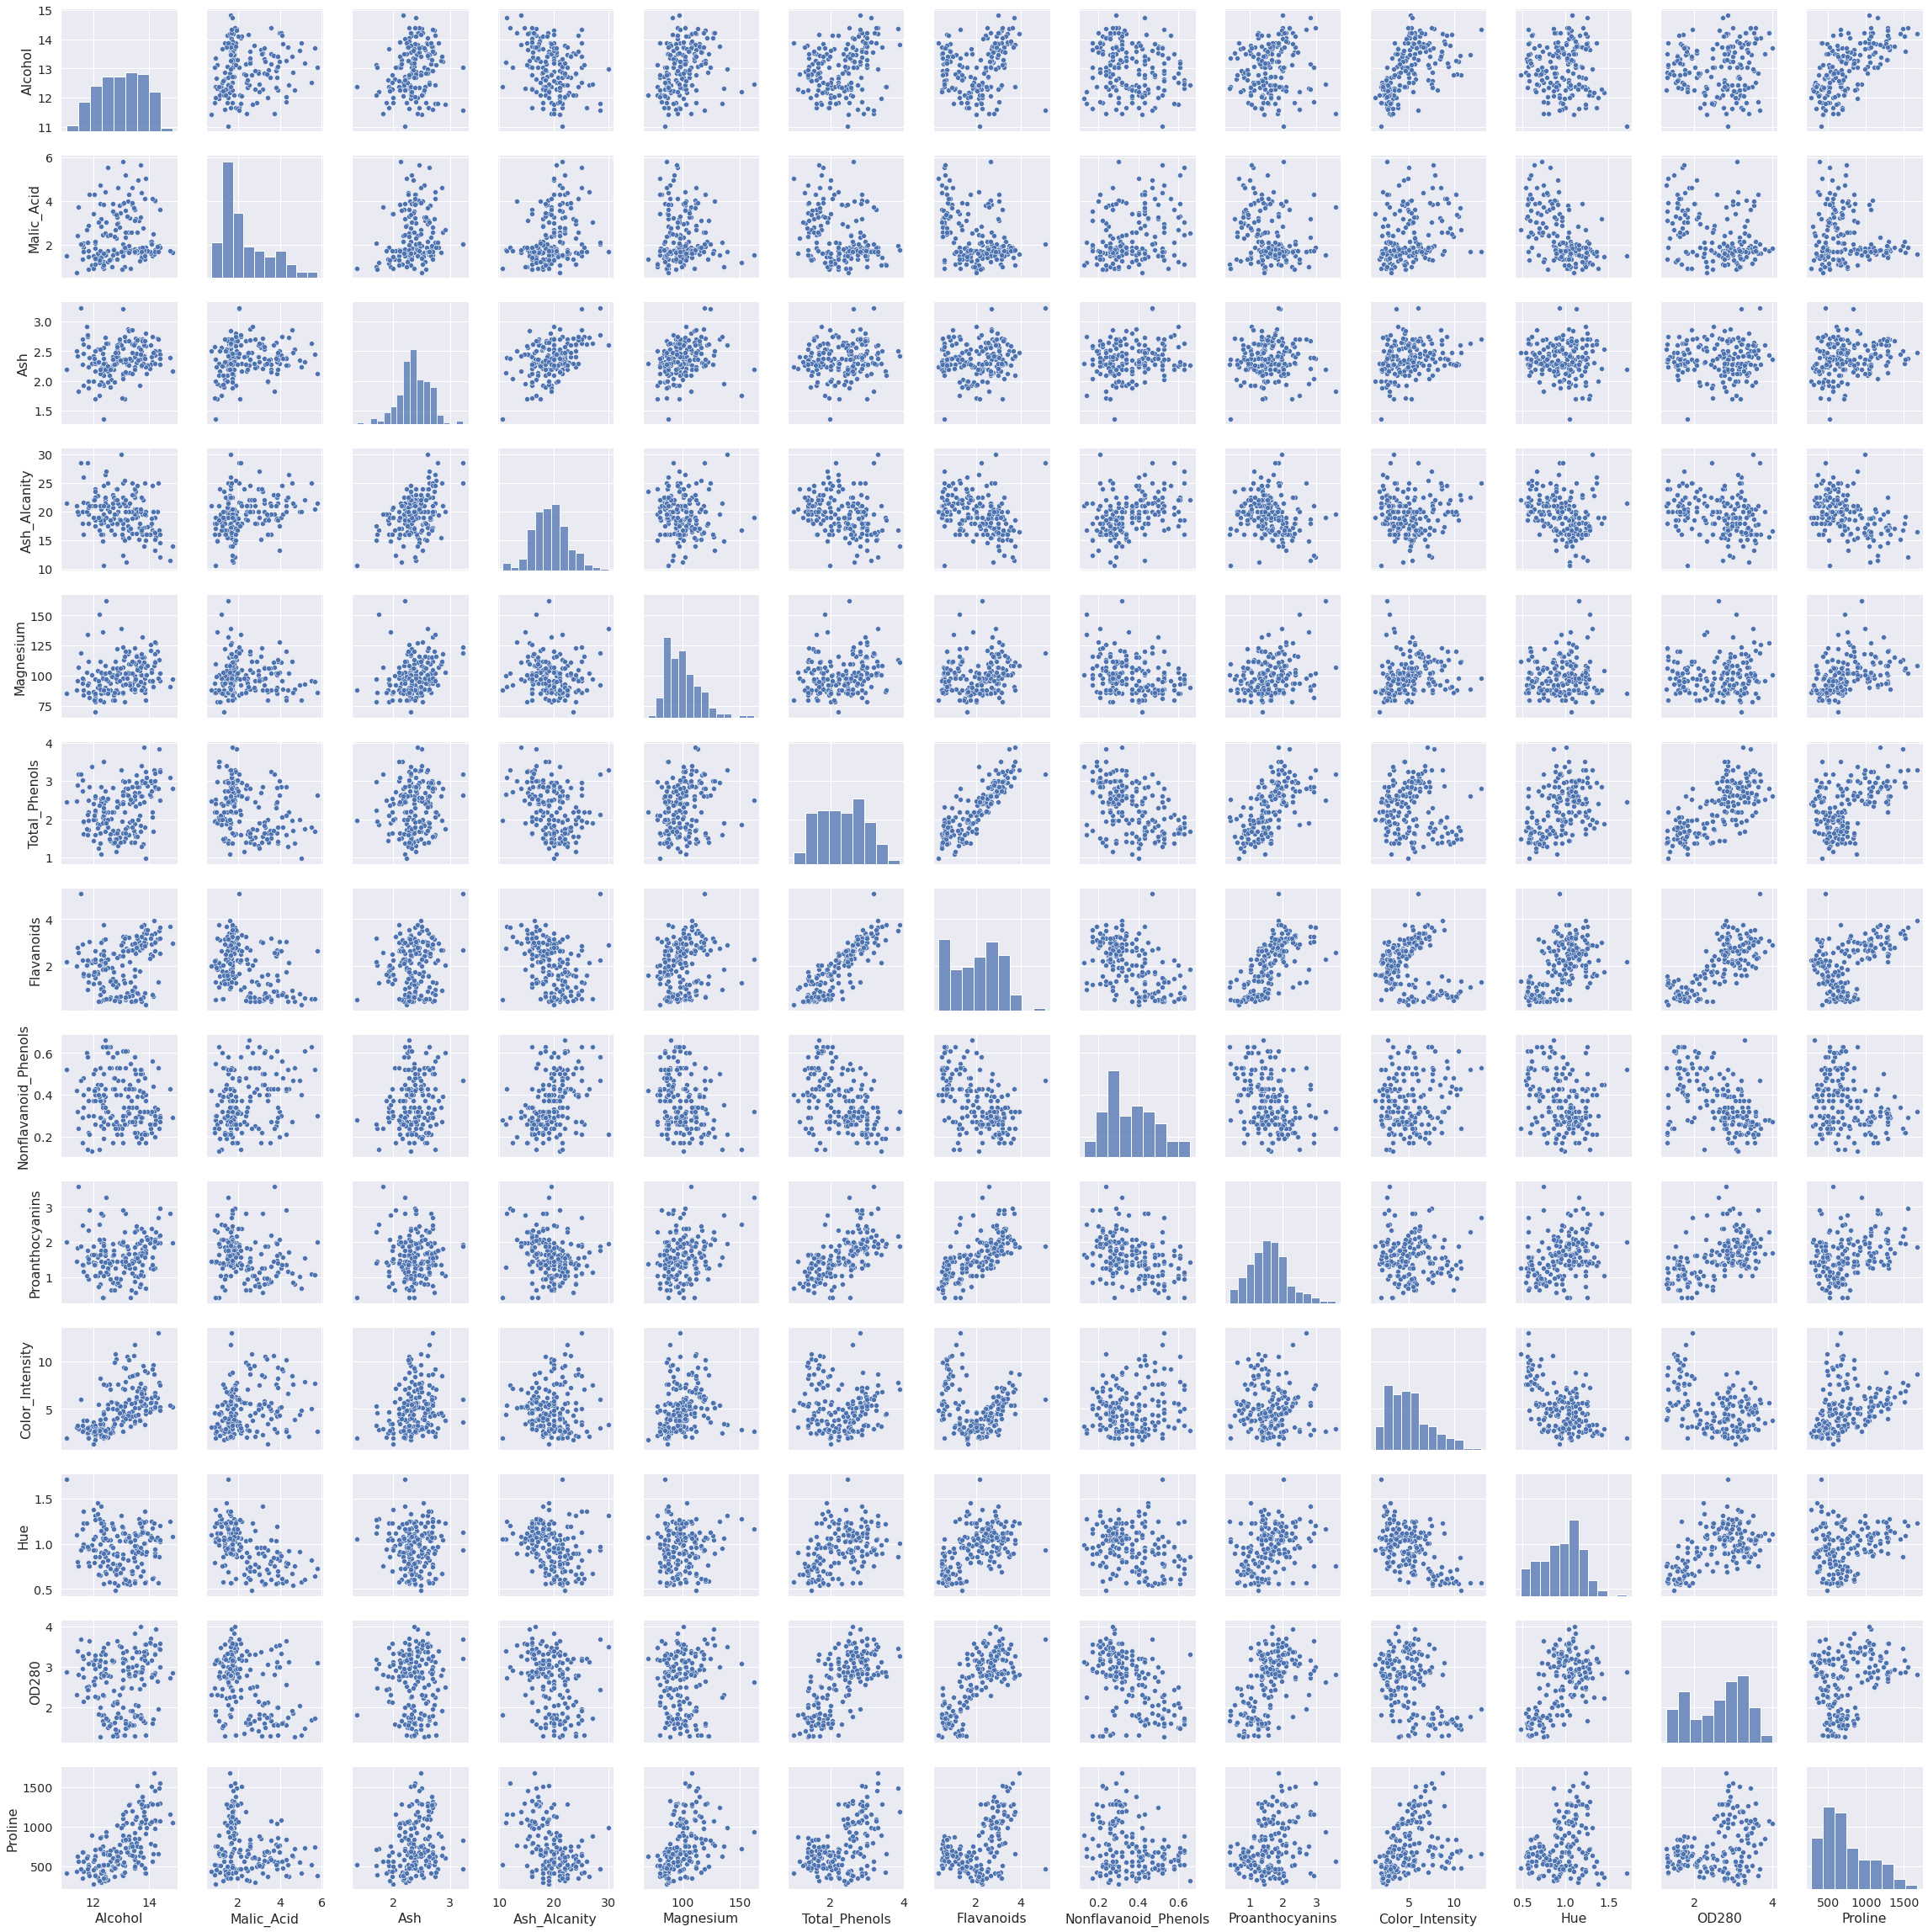

In [20]:
sns.pairplot(df)
plt.show()

# Pre-Proprocessing 

In [29]:
df_scaled = preprocessing.scale(df)

In [35]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [28]:
#scaler = StandardScaler()




In [33]:
#scaled_df= scaler.fit_transform(df)

In [36]:
#scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

We will need to apply dimension reductionn.
Principal Component Analysis, will convert all the features into a 2D graph, so that we are able to plot the correlation.

X axis - PC1
y axis - PC2

In [38]:
pca_var = PCA(2)
result_pca = pca_var.fit_transform(df_scaled)


In [41]:
pca_ratio =  (np.sum(pca_var.explained_variance_ratio_))*100

In [42]:
pca_ratio

55.40633835693528

In [43]:
print("Cumulative variance for two principal components: {}".format(pca_ratio))

Cumulative variance for two principal components: 55.40633835693528


In [ ]:
result_pca

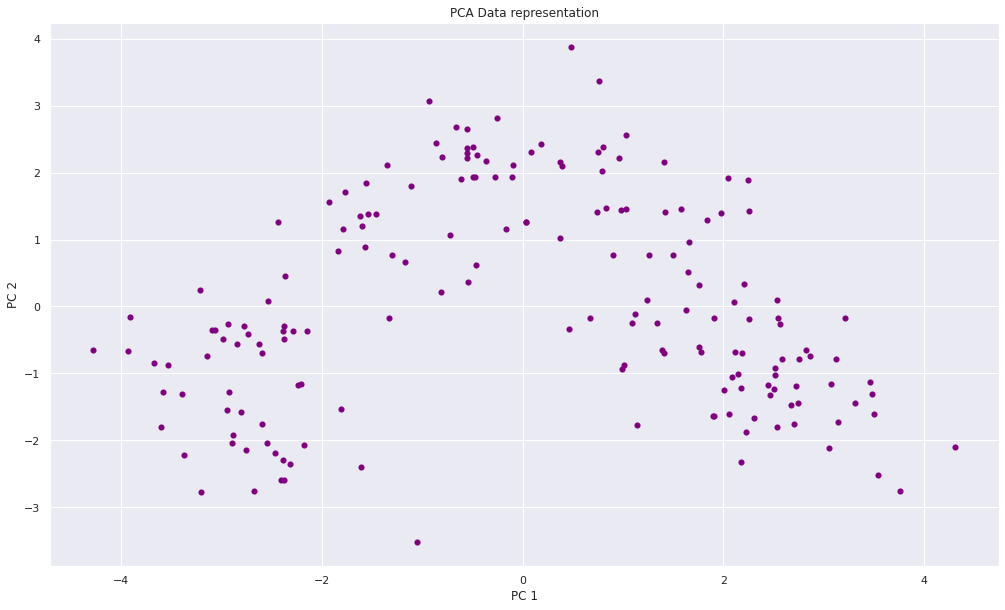

In [50]:
plt.figure(figsize=(17,10))
plt.scatter(x=result_pca[:, 0], y=result_pca[:, 1], color='purple',lw=0.1)
plt.title("PCA Data representation");
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [ ]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=result_pca[:,1])
plt.show()

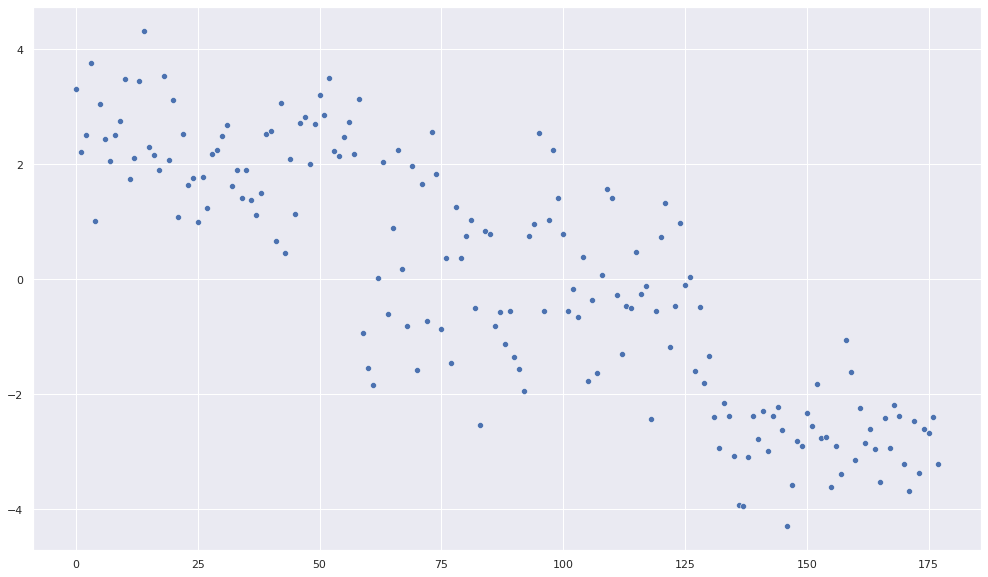

In [51]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=result_pca[:,0])
plt.show()


# Elbow method 

In [52]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

wcss

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1175.705192819712,
 1105.9103595900551,
 1046.7867083519932,
 1002.4437908952984,
 933.0061329528243,
 906.1407360754912]

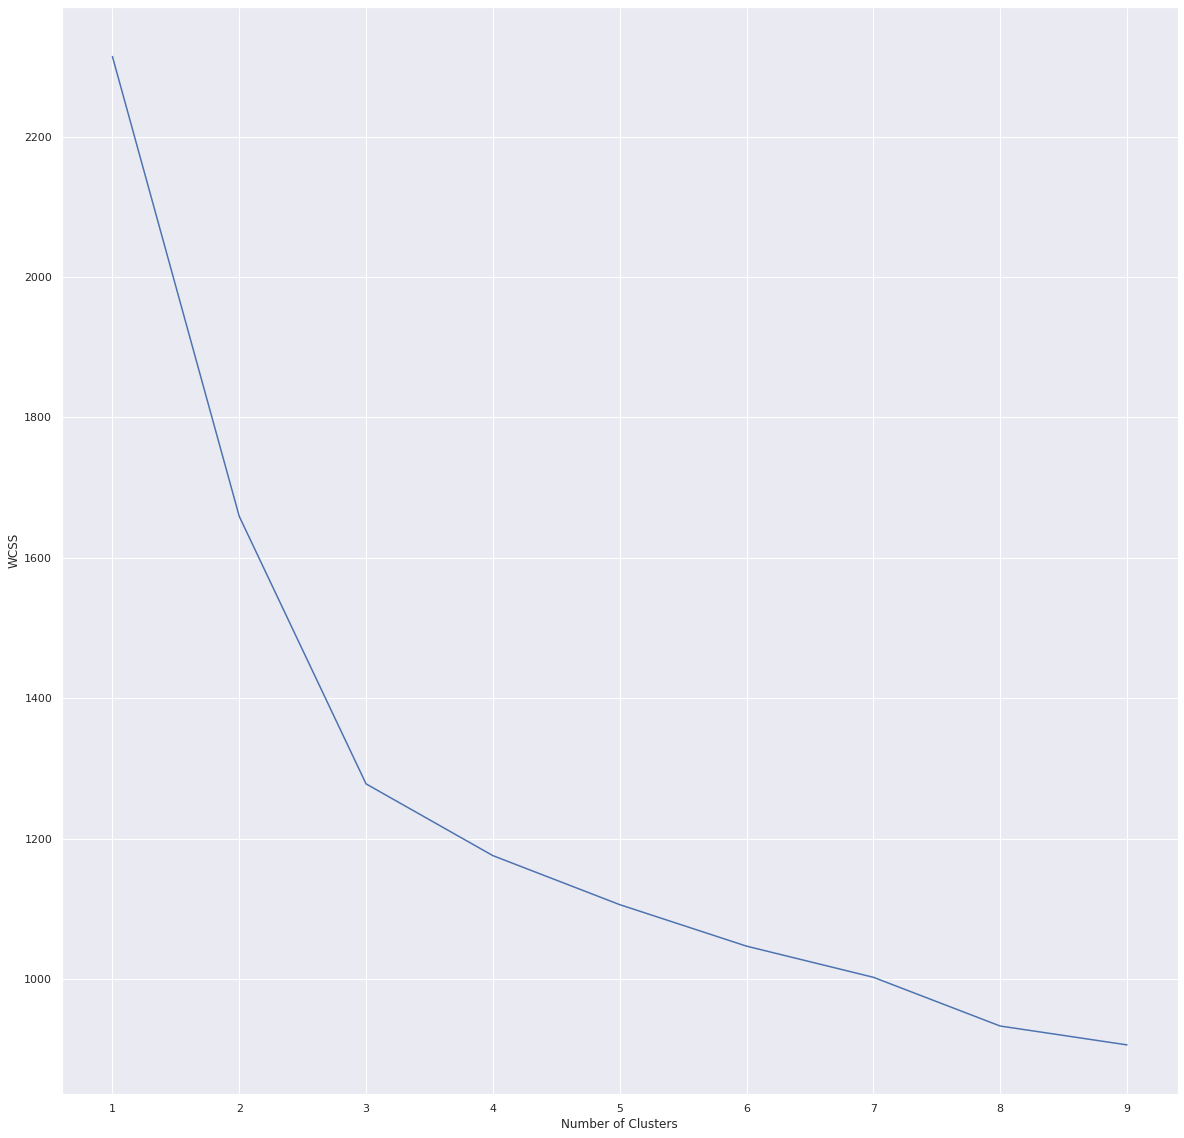

In [53]:
plt.plot(range(1,10), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Kmeans Clustering 

In [70]:
kmeans_new = KMeans(n_clusters=3)
kmeans_new.fit(df_scaled)
centroids = kmeans_new.cluster_centers_
centroids_pca = pca_var.transform(centroids)
cluster_new = df.copy()
cluster_new["cluster_pred"] = kmeans_new.fit_predict(df_scaled)



In [71]:
pd.Series(cluster_new["cluster_pred"]).value_counts()

0    65
2    62
1    51
Name: cluster_pred, dtype: int64

In [72]:
cluster_new

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


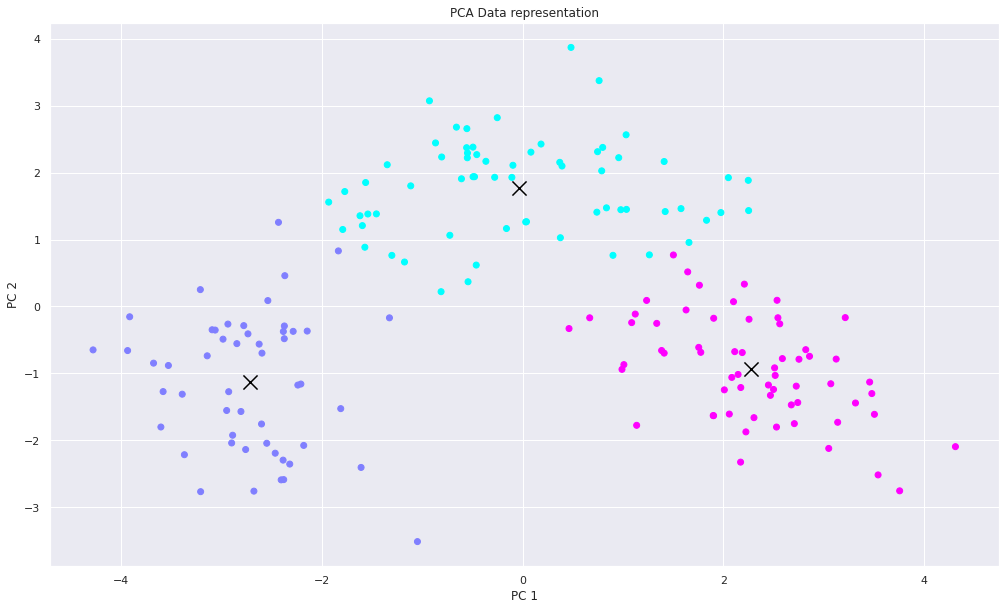

In [78]:

plt.figure(figsize=(17,10))
plt.scatter(x=result_pca[:, 0], y=result_pca[:, 1], c=cluster_new["cluster_pred"], cmap='cool')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],color='black',marker='x', s=200)
plt.title("PCA Data representation");
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

Kmeans of 3 is the best value to divide the dataset, and as a result, The Dataset shows three different Clusters of Wines.